# A. There are different ways to access the files:

## 1.	Map network drive
You can map this new sharepoint site in a similar way as the old one:
Do this only once:
-	Log in to https://wageningenur4.sharepoint.com/sites/LoobosTeamsite with InternetExplorer (the old one, this step does not work with other browsers)
-	Go to settings (gearbox top right) --> Internet Options --> Security tab --> and add https://wageningenur4.sharepoint.com to the list of trusted sites
-	Go to Windows Explorer --> Home (menu bar) --> Easy Access --> Map as Drive --> Select an unused drive letter (e.g. L:\. At least >= D, as A,B,C are reserved for floppy disks and hard disks), copy in to https://wageningenur4.sharepoint.com/sites/LoobosTeamsite into ‘Folder’ and click Finish
-	The Sharepoint should now be available via the drive letter you selected.

Do this each time you want to use the drive letter:
-	Log in in to https://wageningenur4.sharepoint.com/sites/LoobosTeamsite with InternetExplorer (the old one, this step does not work with other browsers)
-	In Windows Explorer, select the drive letter to connect again.

## 2.	Shortcut via OneDrive
-	Open https://wageningenur4.sharepoint.com/sites/LoobosTeamsite in any browser
-	Select ‘Add shortcut to OneDrive’
-	In your OneDrive (either via the browser or WindowsExplorer), the sharepoint is now accessible. In my case it was via C:\Users\molen050\OneDrive – WageningenUR\Documents.
-	You can either use that path as the datapath or assign OneDrive a special drive letter:
-	Hit the windows key and type ‘cmd’ to open a dos command window. Type: subst L: "c:\Users\molen050\OneDrive – WageningenUR\Documents\"
-	The Sharepoint will now be accessible via O:\

## 3.	Download the data to your own drive
-	Simple, reliable, but you will not get updates on the data.



# B.	Reading the data in Python
In the Folder DataShare/PythonScripts/ there are two files:
- a python script Loobos_ReadData.py and 
- a Jupyter Notebook Loobos_ReadData.ipynb. 
They contain the same set of commands as an example of how to read the data and make a figure using the python package pandas.

Let me know if you have remarks or questions.
Michiel

In [1]:
# Settings
Username   = 'molen050'
years      = range(2001,2022)    #(1997,2021) # Set years to download

In [2]:
import os
datapath   = "..\\"
print('datapath is set to %s'%datapath)

datapath is set to ..\


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import cufflinks as cf
from datetime import datetime, timedelta
#import plotly.express as px
#import cufflinks as cf
#cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)

import sys
sys.path.insert(0, os.path.join(datapath,'PythonScripts'))
from Loobos_Toolbox import Read_LoobosEddFinal, Read_LooStor, Read_LoodatGapfill, Read_Loobos_halfhourly, Read_Loobos_meteo, Read_Loobos_soil, Read_Loobos_profile

In [4]:
#my own functions
from Loobos_Toolbox_Dendro_Grwater import Read_Dendrometers,notmatch

In [70]:
#formula for trendline calculation. sources:
#https://stackoverflow.com/questions/37337836/linear-regression-with-pandas-time-series
#and
#https://stackoverflow.com/questions/17638137/curve-fitting-to-a-time-series-in-the-format-datetime

def trend(s):
    s.dropna(inplace=True)
    x = mdates.date2num(s.index)
    z = np.polyfit(x, s.values, 1) #output example: [1.0e-01 , 1.0e+2]
    p = np.poly1d(z) #output example: 0.1 x + 100.0
    xx = np.linspace(x.min(), x.max(), 100)
    dd = mdates.num2date(xx)
    output_s = pd.Series(p(xx), index=dd)
    return output_s, z ,p

In [5]:
# Read files
df_EC           = Read_LoobosEddFinal    (years,datapath)
df_Stor         = Read_LooStor           (years,datapath)
df_Comb         = Read_LoodatGapfill     (years,datapath)
df_NEE          = Read_Loobos_halfhourly (years,datapath)
df_meteo        = Read_Loobos_meteo      (years,datapath)
df_soil         = Read_Loobos_soil       (years,datapath)
df_profile      = Read_Loobos_profile    (years,datapath)


Loading 2001
Loading 2002
Loading 2003
Loading 2004
Loading 2005
Loading 2006
Loading 2007
Loading 2008
Loading 2009
Loading 2010
Loading 2011
Loading 2012
Loading 2013
Loading 2014
Loading 2015
Loading 2016
Loading 2017
Loading 2018
Loading 2019
Loading 2020
Loading 2021
df_EC loaded. Columns in this dataframe:
Index(['Doy', 'Dtime', 'Flx_Tsonic', 'Flx_Lo-H2O', 'Flx_Lo-CO2', 'Qf_Tsonic',
       'Qf_Lo-H2O', 'Qf_Lo-CO2', 'Mea_Windsp', 'Mea_Tsonic', 'Mea_Lo-H2O',
       'Mea_Lo-CO2', 'U-star', 'Z-over-L', 'Wind-Dir', '80PercFlux'],
      dtype='object')
Loading 2001
Loading 2002


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2003
Loading 2004


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2005
Loading 2006


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2007
Loading 2008


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2009
Loading 2010


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2011
Loading 2012


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2013
Loading 2014


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2015
Loading 2016


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2017
Loading 2018


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2019
Loading 2020


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2021


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


df_Stor loaded. Columns in this dataframe:
Index(['Day', 'Time', 'TotalT', 'TotalTflux', 'TotalH2O', 'TotalH2Oflux',
       'TotalCO2', 'TotalCO2flux', 'CO2-2.5m', 'CO2flux-2.5m'],
      dtype='object')
Loading 2001
Loading 2002
Loading 2003
Loading 2004
Loading 2005
Loading 2006
Loading 2007
Loading 2008
Loading 2009
Loading 2010
Loading 2011
Loading 2012
Loading 2013
Loading 2014
Loading 2015
Loading 2016
Loading 2017
Loading 2018
Loading 2019
Loading 2020
Loading 2021
df_Comb loaded. Columns in this dataframe:
Index(['Year', 'DoY', 'Hour', 'qcNEE', 'NEE', 'LE', 'H', 'Rg', 'Tair', 'Tsoil',
       'rH', 'Ustar', 'VPD', 'NEE_orig', 'NEE_f', 'NEE_fqc', 'NEE_fall',
       'NEE_fall_qc', 'NEE_fnum', 'NEE_fsd', 'NEE_fmeth', 'NEE_fwin',
       'Rg_orig', 'Rg_f', 'Rg_fqc', 'Rg_fall', 'Rg_fall_qc', 'Rg_fnum',
       'Rg_fsd', 'Rg_fmeth', 'Rg_fwin', 'H_orig', 'H_f', 'H_fqc', 'H_fall',
       'H_fall_qc', 'H_fnum', 'H_fsd', 'H_fmeth', 'H_fwin', 'LE_orig', 'LE_f',
       'LE_fqc', 'LE_fall', 'LE

C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2002
Loading 2003


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2004


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2005
Loading 2006


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2007
Loading 2008


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2009
Loading 2010


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2011
Loading 2012


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2013
Loading 2014


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2015
Loading 2016


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2017
Loading 2018


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2019
Loading 2020


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2021


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Done
df_NEE loaded. Columns in this dataframe:
Index(['NEE_f', 'H_f', 'LE_f', 'Reco_f', 'GPP_f', 'NEE_fqc', 'H_fqc', 'LEfqc',
       'Reco', 'Tair', 'Rg_f', 'VPD', 'Tsoil', 'rH', 'Ustar', 'R-ref', 'E_0'],
      dtype='object')
Loading 2001


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2002


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2003


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2004


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2005


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2006


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2007


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2008


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2009


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2010


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2011
Loading 2012


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2013


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2014


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2015


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2016


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2017


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2018
Loading 2019


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2020


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2021


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


df_meteo loaded. Columns in this dataframe:
Index(['Daynumber', 'Time', 'S(i)', 'S(o)', 'L(i)', 'L(o)', 'G1', 'PAR',
       'H2OLic', 'CO2Lic', '-q', 'Te(vaisal)', 'Te-L(i)', 'Te-L(o)', '-u(z)',
       '-u(dir)', 'Min u(z)', 'WSC therm', 'SD S(i)', 'SD S(o)', 'SD L(i)',
       'SD L(o)', 'SD G1', 'SD PAR', 'SD H2OLic', 'SD CO2Lic', 'SD q',
       'SD Te(vaisal)', 'Battery V', 'CR10 temp', 'P(mast)00', 'P(guter)00',
       'P(mast)05', 'P(guter)05', 'P(mast)10', 'P(guter)10', 'P(mast)15',
       'P(guter)15', 'P(mast)20', 'P(guter)20', 'P(mast)25', 'P(guter)25',
       'P(mast)', 'P(guter)', 'P(field)', 'L(i)corr', 'L(o)corr', 'R(net)',
       'P(guter)corr', 'Pcorr', 'PARrefl', 'PARdiff', 'H2Olic', 'CO2lic',
       'Vbatt', 'CR10temp', 'SD u(z)', '#NAME?', '#NAME?.1', '#NAME?.2'],
      dtype='object')
Loading ..\\Soilmoist\Final\Loosoifinal01.csv...
Loading ..\\Soilmoist\Final\Loosoifinal02.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ..\\Soilmoist\Final\Loosoifinal03.csv...
Loading ..\\Soilmoist\Final\Loosoifinal04.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ..\\Soilmoist\Final\Loosoifinal05.csv...
Loading ..\\Soilmoist\Final\Loosoifinal06.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ..\\Soilmoist\Final\Loosoifinal07.csv...
Loading ..\\Soilmoist\Final\Loosoifinal08.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ..\\Soilmoist\Final\Loosoifinal09.csv...
Loading ..\\Soilmoist\Final\Loosoifinal10.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ..\\Soilmoist\Final\Loosoifinal11.csv...
Loading ..\\Soilmoist\Final\Loosoifinal12.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ..\\Soilmoist\Final\Loosoifinal13.csv...
Loading ..\\Soilmoist\Final\Loosoifinal14.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ..\\Soilmoist\Final\Loosoifinal15.csv...
Loading ..\\Soilmoist\Final\Loosoifinal16.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ..\\Soilmoist\Final\Loosoifinal17.csv...
Loading ..\\Soilmoist\Final\Loosoifinal18.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ..\\Soilmoist\Final\Loosoifinal19.csv...
Loading ..\\Soilmoist\Final\Loosoifinal20.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ..\\Soilmoist\Final\Loosoifinal21.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


df_soil loaded. Columns in this dataframe:
Index(['Time', 'Daynumber', 'Year', 'EC200', 'EC201', 'EC202', 'EC203',
       'EC204', 'EC205', 'EC206', 'EC207', 'EC208', 'EC209', 'Temp200',
       'Temp201', 'Temp202', 'Temp203', 'Temp204', 'Temp205', 'Temp206',
       'Temp207', 'Temp208', 'Temp209', 'Eps200co', 'Eps201co', 'Eps202co',
       'Eps203co', 'Eps204co', 'Eps205co', 'Eps206co', 'Eps207co', 'Eps208co',
       'Eps209co', 'SM-Lit', 'SM-003', 'SM-020', 'SM-050', 'SM-100', 'ST-Lit',
       'ST-003', 'ST-020', 'ST-050', 'ST-100', 'T-bole'],
      dtype='object')
Loading 2001
Loading 2002


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2003
Loading 2004


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2005
Loading 2006


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2007
Loading 2008


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2009
Loading 2010


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2011
Loading 2012


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2013
Loading 2014


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2015
Loading 2016


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2017
Loading 2018


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2019
Loading 2020


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2021


C:\Users\feder\Workspace\Thesis\PythonScripts\..\PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


df_profile loaded. Columns in this dataframe:
Index(['Daynumber', 'Time', 'Vtemptop', 'Vtempmid', 'Vtempbot', 'VaiVPtop',
       'VaiVPmid', 'Pressure', 'VecWStop', 'VecWSmid', 'VecWSbot', 'H2Olevel1',
       'H2Olevel2', 'H2Olevel3', 'H2Olevel4', 'H2Olevel5', 'CO2level1',
       'CO2level2', 'CO2level3', 'CO2level4', 'CO2level5', 'H2Ocal', 'CO2cal'],
      dtype='object')


In [49]:
#set default legend placement to upper left set to 'best' to revert behavior to default
plt.rcParams["legend.loc"]='upper left'

## trends of inputs to the Ags (Lo_corr, VPD, CO2, ...)

[ 2.45728949e-02 -3.83964875e+01]
slope: +0.02457 /day , intercept: -38.396
slope: +8.975 /yr
value in 2001: 239.84240138483509
value in 2020: 410.35371905585873
value in 2040: 589.8587162581686
% increase: +71.09%


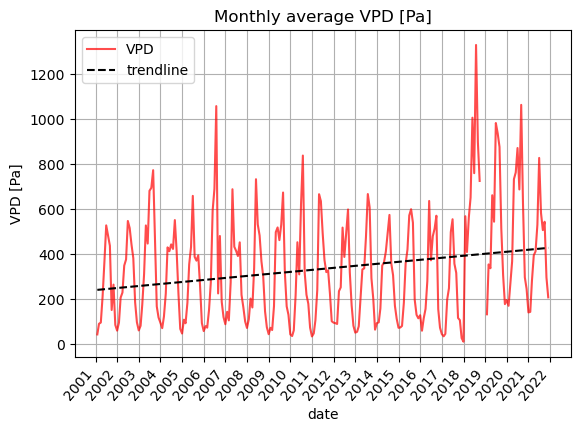

In [114]:
#VPD
df_VPD_filt=df_Comb[['VPD']]
df_VPD_filt=df_VPD_filt.loc[df_VPD_filt['VPD']>=0]
df_VPD_filt=df_VPD_filt[['VPD']].resample('1M').mean()

df_VPD_filt_Pa=df_VPD_filt[['VPD']]*100

VPD_trend,VPD_param,VPD_poly=trend(df_VPD_filt_Pa['VPD'])

#df_VPD_filt['VPD'].plot()
fig,ax=plt.subplots()

ax.set_title('Monthly average VPD [Pa]')

ax.plot(df_VPD_filt_Pa['VPD'],c='r',alpha=0.7,label='VPD')
#plot the trendline
ax.plot(VPD_trend,'--k',label='trendline')
#print parameters
print(VPD_param)
print('slope: {:+.5f} /day , intercept: {:+.3f}'.format(VPD_param[0],VPD_param[1]))
print('slope: {:+.3f} /yr'.format(VPD_param[0]*365.24)) #convert to year
VPD_2001=VPD_poly(mdates.date2num(pd.to_datetime('2001-01-01')))
VPD_2020=VPD_poly(mdates.date2num(pd.to_datetime('2020-01-01')))
VPD_2040=VPD_poly(mdates.date2num(pd.to_datetime('2040-01-01')))
print('value in 2001:',VPD_2001)
print('value in 2020:',VPD_2020)
print('value in 2040:',VPD_2040)
print('% increase: {:+.2f}%'.format((VPD_2020/VPD_2001-1)*100))

#ax.set_ylim(0,12)
ax.set_ylabel('VPD [Pa]')

#ax.set_xlim(0,12)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_xlabel('date')
fig.autofmt_xdate(rotation=50)

ax.legend()

ax.grid()


[-5.54358641e-05  2.61737850e+02]
slope: -0.000 /day, intercept: +261.738
slope: -0.020 /yr
value in 2001: 261.1101498429709
value in 2020: 260.7254803819859
value in 2040: 260.3205213947406
% increase: -0.15%


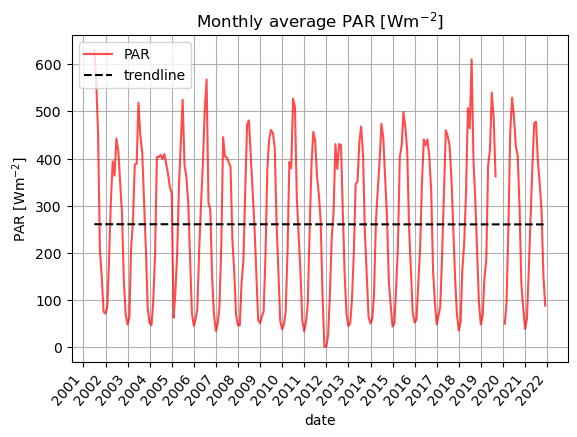

In [118]:
#PAR
df_PAR_filt=df_meteo[['PAR']]
df_PAR_filt=df_PAR_filt.loc[df_PAR_filt['PAR']>0]
df_PAR_filt=df_PAR_filt[['PAR']].resample('1M').mean()

PAR_trend,PAR_param,PAR_poly=trend(df_PAR_filt['PAR'])

fig,ax=plt.subplots()

ax.set_title(r'Monthly average PAR [Wm$^{-2}$]')

ax.plot(df_PAR_filt['PAR'],c='r',alpha=0.7,label='PAR')
#plot the trendline
ax.plot(PAR_trend,'--k',label='trendline')
#print parameters
print(PAR_param)
print('slope: {:+.3f} /day, intercept: {:+.3f}'.format(PAR_param[0],PAR_param[1]))
print('slope: {:+.3f} /yr'.format(PAR_param[0]*365.24)) #convert to year
PAR_2001=PAR_poly(mdates.date2num(pd.to_datetime('2001-01-01')))
PAR_2020=PAR_poly(mdates.date2num(pd.to_datetime('2020-01-01')))
PAR_2040=PAR_poly(mdates.date2num(pd.to_datetime('2040-01-01')))
print('value in 2001:',PAR_2001)
print('value in 2020:',PAR_2020)
print('value in 2040:',PAR_2040)
print('% increase: {:+.2f}%'.format((PAR_2020/PAR_2001-1)*100))

#ax.set_ylim(0,12)
ax.set_ylabel(r'PAR [Wm$^{-2}$]')

#ax.set_xlim(0,12)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_xlabel('date')
fig.autofmt_xdate(rotation=50)

ax.legend()

ax.grid()


[6.80673260e-03 3.05100603e+02]
slope: +0.007 /day, intercept: +305.101
slope: +2.486 /yr
value in 2001: 382.1732362784878
value in 2020: 429.40515379562447
value in 2040: 479.12833544466366
% increase: +12.36%


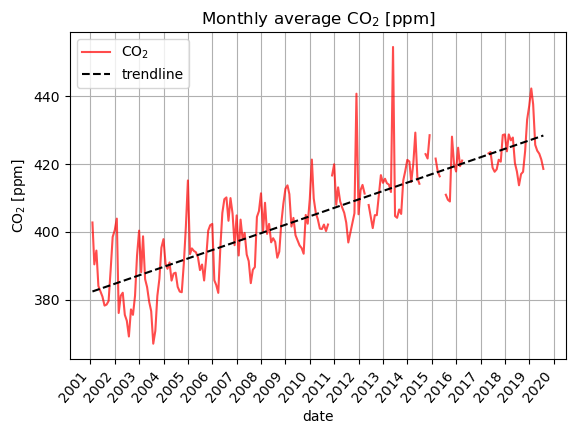

In [116]:
#CO2
df_CO2_filt=df_profile[['CO2level1']]
df_CO2_filt=df_CO2_filt.loc[df_CO2_filt['CO2level1']>=300]
df_CO2_filt=df_CO2_filt[['CO2level1']].resample('1M').mean()

CO2_trend,CO2_param,CO2_poly=trend(df_CO2_filt['CO2level1'])

fig,ax=plt.subplots()

ax.set_title(r'Monthly average CO$_2$ [ppm]')

ax.plot(df_CO2_filt['CO2level1'],c='r',alpha=0.7,label=r'CO$_2$')
#plot the trendline
ax.plot(CO2_trend,'--k',label='trendline')
#print parameters
print(CO2_param)
print('slope: {:+.3f} /day, intercept: {:+.3f}'.format(CO2_param[0],CO2_param[1]))
print('slope: {:+.3f} /yr'.format(CO2_param[0]*365.24)) #convert to year
CO2_2001=CO2_poly(mdates.date2num(pd.to_datetime('2001-01-01')))
CO2_2020=CO2_poly(mdates.date2num(pd.to_datetime('2020-01-01')))
CO2_2040=CO2_poly(mdates.date2num(pd.to_datetime('2040-01-01')))
print('value in 2001:',CO2_2001)
print('value in 2020:',CO2_2020)
print('value in 2040:',CO2_2040)
print('% increase: {:+.2f}%'.format((CO2_2020/CO2_2001-1)*100))


#ax.set_ylim(0,12)
ax.set_ylabel(r'CO$_2$ [ppm]')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_xlabel('date')
fig.autofmt_xdate(rotation=50)

ax.legend()

ax.grid()


[9.48589376e-04 3.51412171e+02]
slope: +0.001, intercept: +351.412
slope: +0.346 /yr
value in 2001: 362.1530484708393
value in 2020: 368.7353101513758
value in 2040: 375.66475554355327
% increase: +1.82%


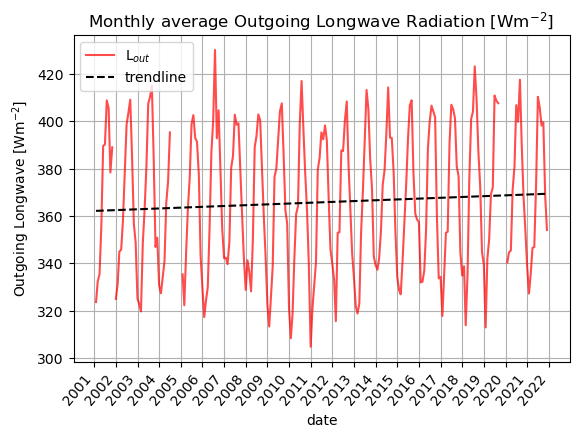

In [117]:
#L_o
df_Locorr_filt=df_meteo[['L(o)corr']]
df_Locorr_filt=df_Locorr_filt.loc[df_Locorr_filt['L(o)corr']<=1000]
df_Locorr_filt=df_Locorr_filt.loc[df_Locorr_filt['L(o)corr']>=200]
df_Locorr_filt=df_Locorr_filt[['L(o)corr']].resample('1M').mean()

LO_trend,LO_param,LO_poly=trend(df_Locorr_filt['L(o)corr'])

fig,ax=plt.subplots()

ax.set_title(r'Monthly average Outgoing Longwave Radiation [Wm$^{-2}$]')

ax.plot(df_Locorr_filt['L(o)corr'],c='r',alpha=0.7,label=r'L$_{out}$')
#plot the trendline
ax.plot(LO_trend,'--k',label='trendline')
#print parameters
print(LO_param)
print('slope: {:+.3f}, intercept: {:+.3f}'.format(LO_param[0],LO_param[1]))
print('slope: {:+.3f} /yr'.format(LO_param[0]*365.24)) #convert to year
LO_2001=LO_poly(mdates.date2num(pd.to_datetime('2001-01-01')))
LO_2020=LO_poly(mdates.date2num(pd.to_datetime('2020-01-01')))
LO_2040=LO_poly(mdates.date2num(pd.to_datetime('2040-01-01')))
print('value in 2001:',LO_2001)
print('value in 2020:',LO_2020)
print('value in 2040:',LO_2040)
print('% increase: {:+.2f}%'.format((LO_2020/LO_2001-1)*100))


#ax.set_ylim(0,12)
ax.set_ylabel(r'Outgoing Longwave [Wm$^{-2}$]')

#ax.set_xlim(mdates.date2num(pd.to_datetime('2001-01-01')),mdates.date2num(pd.to_datetime('2030-01-01')))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_xlabel('date')
fig.autofmt_xdate(rotation=50)

ax.legend()

ax.grid()


# Old graphs (For reference)

## My plots: Bowen ratio, water use efficiency, light use efficiency

In [5]:
plt.rcParams["figure.figsize"] = (20,10) #set the default size of graphs to be wide and not very tall

In [136]:
#SELECT useful data and calculate: bowen ratio is only useful for midday hours, and for when both H and LE are above 50 or 100 W/m2
#step 1: create new dataframe with data of interest
df_bowen = pd.concat([df_Comb['H'],df_Comb['LE'],df_Comb['Hour'],df_Comb['Year']],axis=1,sort=False)

#step 2 select for hours between 9am and 4pm
df_bowen = df_bowen.loc[df_bowen['Hour'] <= 16]
df_bowen = df_bowen.loc[df_bowen['Hour'] >= 9]

#step 3 exclude data where LE or H are below 50
df_bowen = df_bowen.loc[df_bowen['LE'] >= 50]
df_bowen = df_bowen.loc[df_bowen['H'] >= 50]

df_bowen_100 = df_bowen.loc[df_bowen['LE'] >= 100]
df_bowen_100 = df_bowen.loc[df_bowen['H'] >= 100]

#step 4 calulcate bowen ratio
df_bowen['Bowen_R']=df_bowen['H']/df_bowen['LE']
df_bowen_100['Bowen_R']=df_bowen['H']/df_bowen['LE']

#df_bowen

In [138]:
#resampling the dataset so it's a bit more intelligible in a plot
df_bowen_daymean50=df_bowen.resample('D').mean()
df_bowen_daymean100=df_bowen_100.resample('D').mean()
#df_bowen_daymax=df_bowen.resample('D').max()

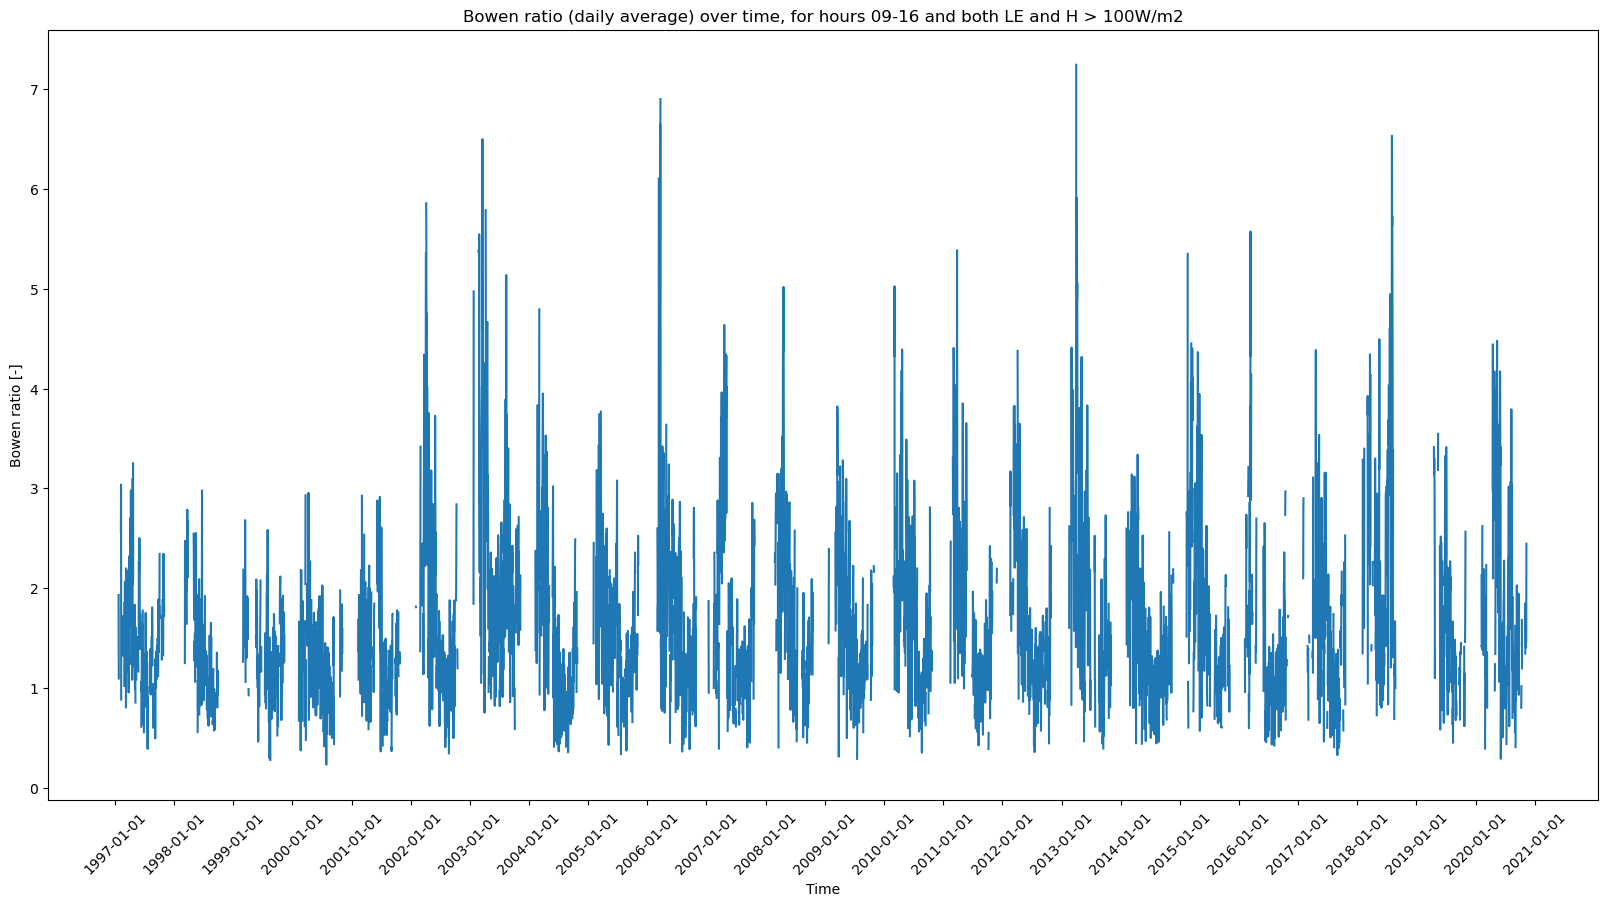

In [139]:
# plot bowen ratio
fig,ax=plt.subplots()
#from datetime import datetime, timedelta

#ax.plot(df_tmp['Bowen_R'])
ax.plot(df_bowen_daymean100['Bowen_R'])

#plt.grid(color='b', linestyle='-', linewidth=1, which='Major', markevery=0.5)
#start, end = ax.get_xlim()
#t = np.arange(start, end, timedelta(years=1)).astype(datetime)
#ax.xaxis.set_ticks(np.arange(start, end, timedelta(days=356)).astype(datetime)) #doesnt seem to work
ax.xaxis.set_ticks([datetime(1997,1,1),
                    datetime(1998,1,1),
                    datetime(1999,1,1),
                    datetime(2000,1,1),
                    datetime(2001,1,1),
                    datetime(2002,1,1),
                    datetime(2003,1,1),
                    datetime(2004,1,1),
                    datetime(2005,1,1),
                    datetime(2006,1,1),
                    datetime(2007,1,1),
                    datetime(2008,1,1),
                    datetime(2009,1,1),
                    datetime(2010,1,1),
                    datetime(2011,1,1),
                    datetime(2012,1,1),
                    datetime(2013,1,1),
                    datetime(2014,1,1),
                    datetime(2015,1,1),
                    datetime(2016,1,1),
                    datetime(2017,1,1),
                    datetime(2018,1,1),
                    datetime(2019,1,1),
                    datetime(2020,1,1),
                    datetime(2021,1,1)])
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
#ax.xaxis.set_major_formatter(ticker.Year)
plt.xticks(rotation=45)

#ax.set_ylim(-1000,1000)
plt.title('Bowen ratio (daily average) over time, for hours 09-16 and both LE and H > 100W/m2')

plt.ylabel('Bowen ratio [-]')
plt.xlabel('Time')
#attempting to make axis labels work (neither of these two work)
#plt.xlablel('Bowen ratio [-]')
#ax.set_xticks(l)

#attempting to make it so there are more x ticks than just seven (doesnt work, will just print all of them on the far left)
#relevant functions are: set_xticks() and set_xticklabels()

#x = [0,5,9,10,15]
#y = [0,1,2,3,4]
#fig, ax = plt.subplots()
#ax.plot(x,y)
#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 0.712123))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
#plt.show()


plt.show()

### Water Use Efficiency

In [140]:
#SELECT useful data and calculate: water use efficiency
#step 1: create new dataframe with data of interest
df_WUE = pd.concat([df_Comb['GPP_f'],df_Comb['LE'],df_Comb['Hour'],df_Comb['Year']],axis=1,sort=False)

#step 2 select for hours between 9am and 4pm
df_WUE = df_WUE.loc[df_WUE['Hour'] <= 16]
df_WUE = df_WUE.loc[df_WUE['Hour'] >= 9]

#step 3 exclude data where LE or H are below 50
df_WUE = df_WUE.loc[df_WUE['LE'] >= 100]
#df_bowen = df_bowen.loc[df_bowen['H'] >= 50]

#df_bowen_100 = df_bowen.loc[df_bowen['LE'] >= 100]
#df_bowen_100 = df_bowen.loc[df_bowen['H'] >= 100]



#step 4 calulcate bowen ratio
df_WUE['WaterUseEff']=df_WUE['GPP_f']/df_WUE['LE']

df_WUE_daymean=df_WUE.resample('D').mean()

#df_bowen

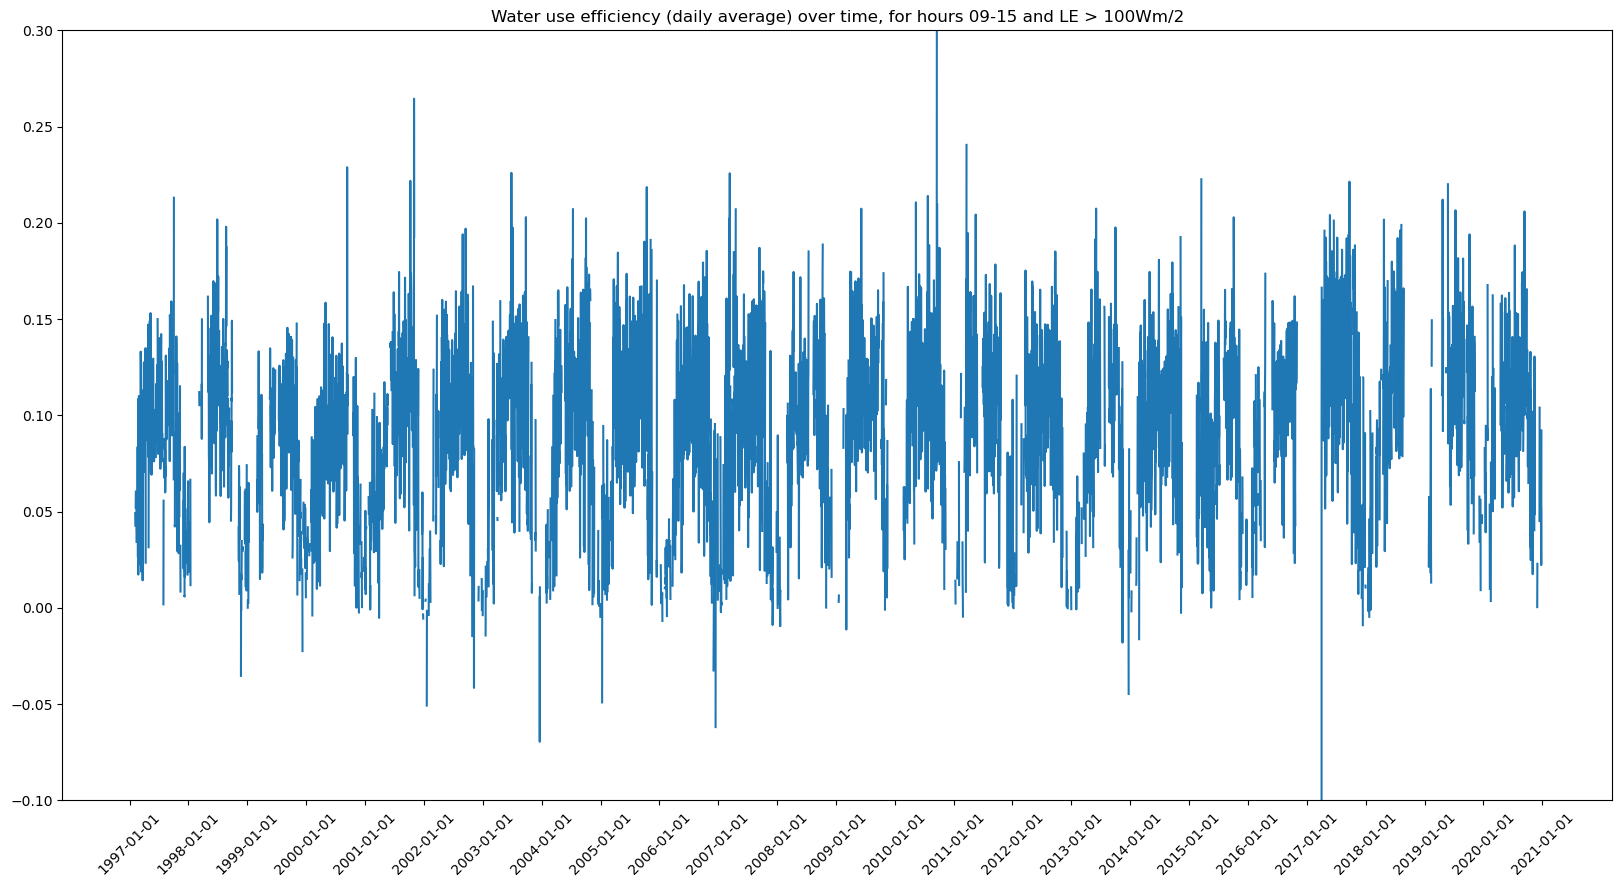

In [141]:
# plot water use efficiency
fig,ax=plt.subplots()

#ax.plot(df_tmp['Bowen_R'])
ax.plot(df_WUE_daymean['WaterUseEff'])
ax.set_ylim(-0.1,0.3)

ax.xaxis.set_ticks([datetime(1997,1,1),
                    datetime(1998,1,1),
                    datetime(1999,1,1),
                    datetime(2000,1,1),
                    datetime(2001,1,1),
                    datetime(2002,1,1),
                    datetime(2003,1,1),
                    datetime(2004,1,1),
                    datetime(2005,1,1),
                    datetime(2006,1,1),
                    datetime(2007,1,1),
                    datetime(2008,1,1),
                    datetime(2009,1,1),
                    datetime(2010,1,1),
                    datetime(2011,1,1),
                    datetime(2012,1,1),
                    datetime(2013,1,1),
                    datetime(2014,1,1),
                    datetime(2015,1,1),
                    datetime(2016,1,1),
                    datetime(2017,1,1),
                    datetime(2018,1,1),
                    datetime(2019,1,1),
                    datetime(2020,1,1),
                    datetime(2021,1,1)])

plt.xticks(rotation=45)

plt.title('Water use efficiency (daily average) over time, for hours 09-15 and LE > 100Wm/2')

plt.show()

## Plotting Bowen ratio and WUE combined

## Light use Efficiency

In [88]:
#SELECT useful data
#step 1: create new dataframe with data of interest
df_LUE = pd.concat([df_meteo['S(i)'],df_Comb['GPP_f'],df_Comb['Hour'],df_Comb['Year']],axis=1,sort=False)

#step 2 select for daylight hours by using S(i)
df_LUE = df_LUE.loc[df_LUE['S(i)'] >= 100]

#too much data for a scatterplot, split into 4 periods of 6 years (2021-1997 = 24. 24/4 = 6)
#1997-2003 2004-2009 2010-2015 2016-2021

df_LUE_1 = df_LUE.loc[df_LUE['Year'] >=1997].loc[df_LUE['Year'] <=2003 ]
df_LUE_2 = df_LUE.loc[df_LUE['Year'] >=2004].loc[df_LUE['Year'] <=2009 ]
df_LUE_3 = df_LUE.loc[df_LUE['Year'] >=2010].loc[df_LUE['Year'] <=2015 ]
df_LUE_4 = df_LUE.loc[df_LUE['Year'] >=2016].loc[df_LUE['Year'] <=2021 ]

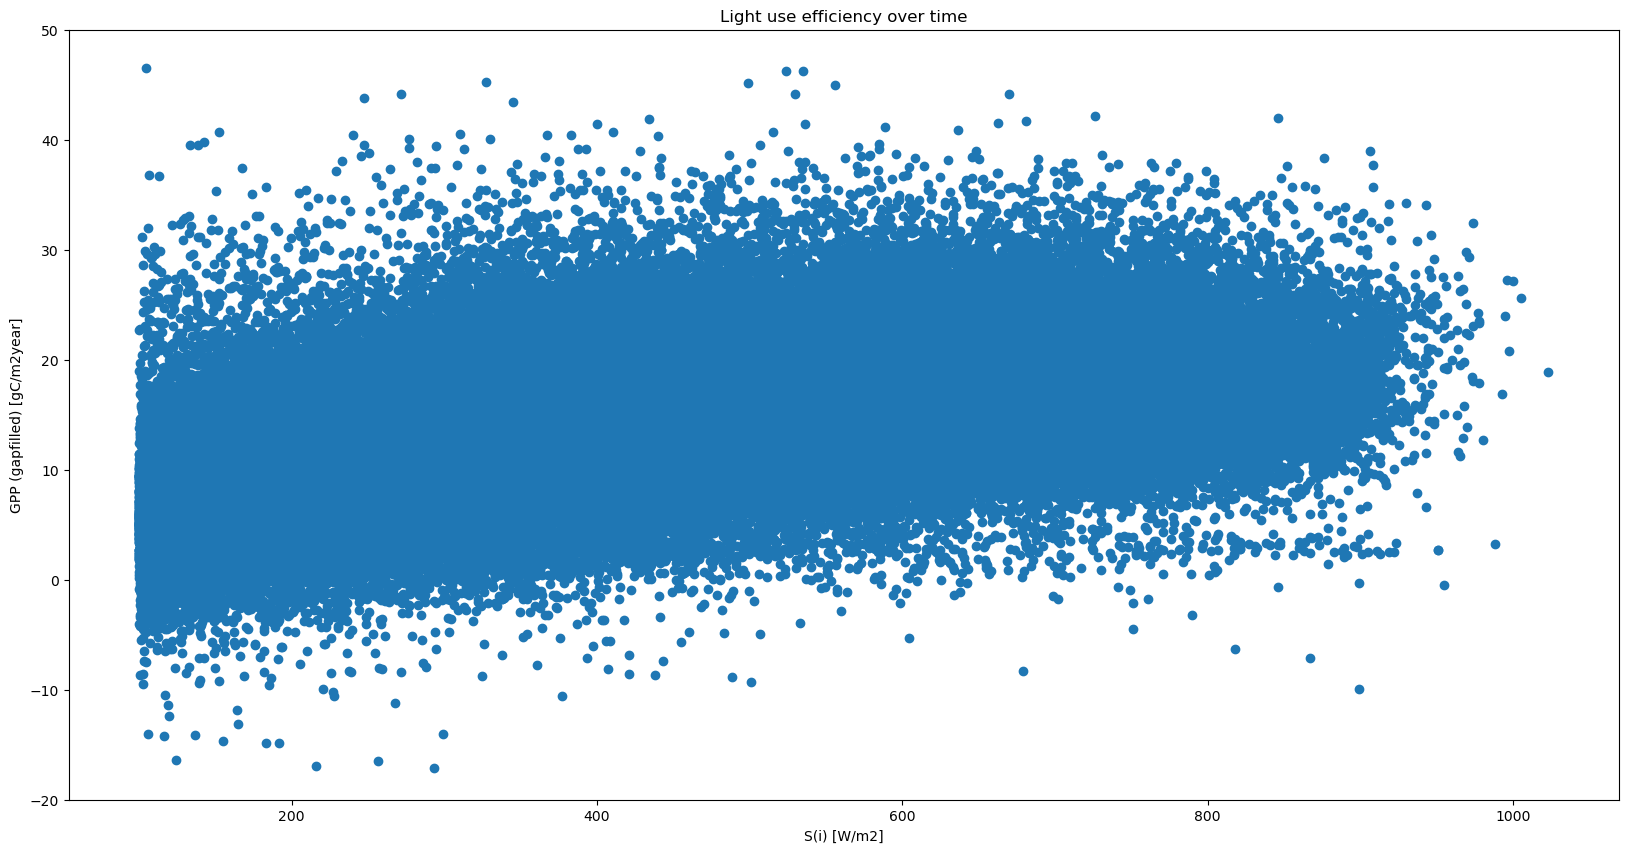

In [89]:
# plot light use efficiency
fig,ax=plt.subplots()

#df_LUE = df_LUE.loc[df_LUE['Year'] == 1998.0]

#df_LUE=df_LUE.resample('D').mean()

ax.scatter(x=df_LUE['S(i)'],y=df_LUE['GPP_f'])
ax.set_ylim(-20,50)
plt.ylabel('GPP (gapfilled) [gC/m2year]')
plt.xlabel('S(i) [W/m2]')
plt.title('Light use efficiency over time')



plt.show()

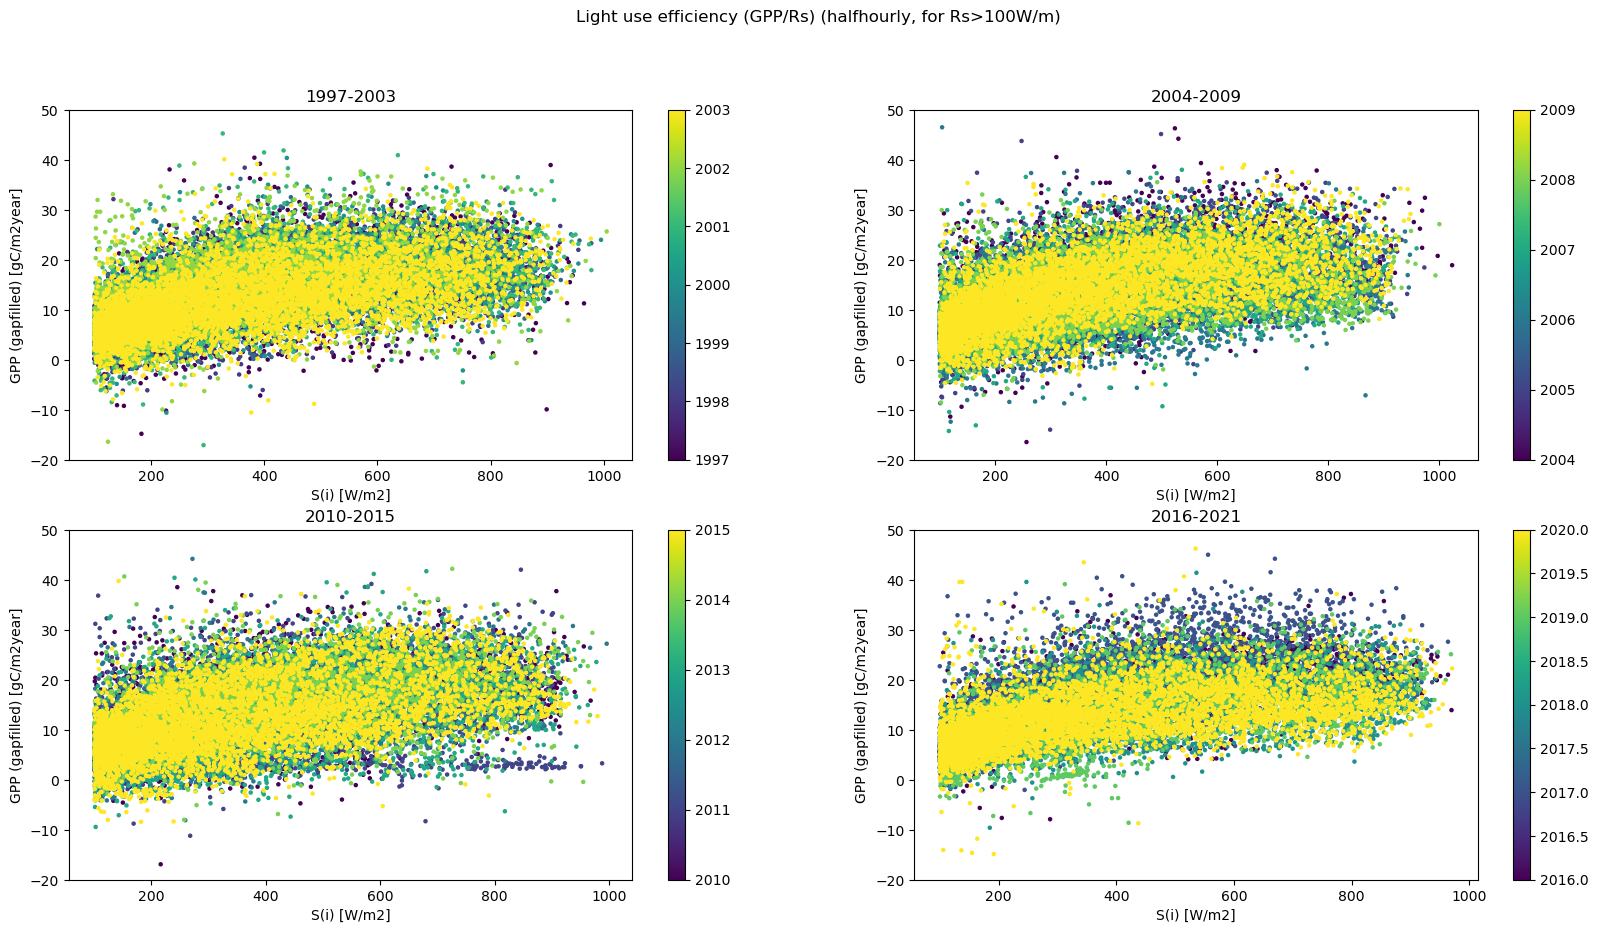

In [115]:
# plot light use efficiency in 4 periods of 6 years
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.suptitle('Light use efficiency (GPP/Rs) (halfhourly, for Rs>100W/m)')

#df_LUE = df_LUE.loc[df_LUE['Year'] == 1998.0]

#df_LUE=df_LUE.resample('D').mean()

a=axes[0,0].scatter(x=df_LUE_1['S(i)'],y=df_LUE_1['GPP_f'],c=df_LUE_1.Year,cmap='viridis',s=5)
axes[0,0].set_ylim(-20,50)
axes[0,0].set_title('1997-2003')
b=axes[0,1].scatter(x=df_LUE_2['S(i)'],y=df_LUE_2['GPP_f'],c=df_LUE_2.Year,cmap='viridis',s=5)
axes[0,1].set_ylim(-20,50)
axes[0,1].set_title('2004-2009')
c=axes[1,0].scatter(x=df_LUE_3['S(i)'],y=df_LUE_3['GPP_f'],c=df_LUE_3.Year,cmap='viridis',s=5)
axes[1,0].set_ylim(-20,50)
axes[1,0].set_title('2010-2015')
d=axes[1,1].scatter(x=df_LUE_4['S(i)'],y=df_LUE_4['GPP_f'],c=df_LUE_4.Year,cmap='viridis',s=5)
axes[1,1].set_ylim(-20,50)
axes[1,1].set_title('2016-2021')

for axi in axes:
    for ax in axi:
        ax.set_ylabel('GPP (gapfilled) [gC/m2year]')
        ax.set_xlabel('S(i) [W/m2]')

#import matplotlib.dates as mdates
#myFmt = mdates.DateFormatter('%d')
#ax.xaxis.set_major_formatter(myFmt)

plt.colorbar(a,ax=axes[0,0]) # seems to work
plt.colorbar(b,ax=axes[0,1])
plt.colorbar(c,ax=axes[1,0])
plt.colorbar(d,ax=axes[1,1])


plt.show()